In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn31.csv')
data.head()

SeniorCitizen  tenure  PhoneService  MultipleLines  InternetService  \
0              0       1             0              1                0   
1              0      34             1              0                0   
2              0       2             1              0                0   
3              0      45             0              1                0   
4              0       2             1              0                1   

   OnlineBackup  DeviceProtection  StreamingTV  StreamingMovies  \
0             2                 0            0                0   
1             0                 2            0                0   
2             2                 0            0                0   
3             0                 2            0                0   
4             0                 0            0                0   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

In [3]:
# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      SeniorCitizen  tenure  PhoneService  MultipleLines  InternetService  \
0                 0       1             0              1                0   
1                 0      34             1              0                0   
2                 0       2             1              0                0   
3                 0      45             0              1                0   
4                 0       2             1              0                1   
...             ...     ...           ...            ...              ...   
7038              0      24             1              2                0   
7039              0      72             1              2                1   
7040              0      11             0              1                0   
7041              1       4             1              2                1   
7042              0      66             1              0                1   

      OnlineBackup  DeviceProtection  StreamingTV  StreamingMovies  \
0    

In [4]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8041163946061036
Precision: 0.6666666666666666
Recall: 0.5201072386058981
F1-score: 0.5843373493975904
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



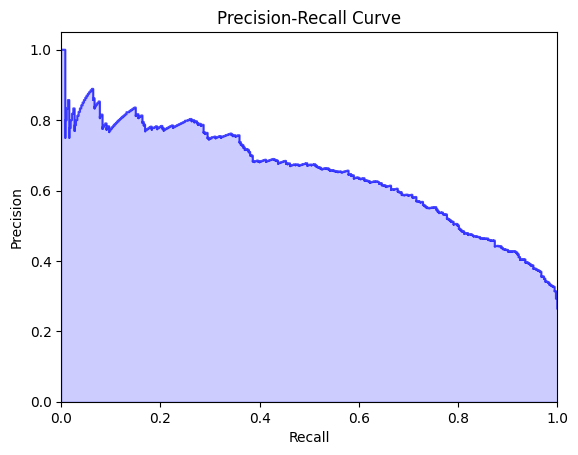

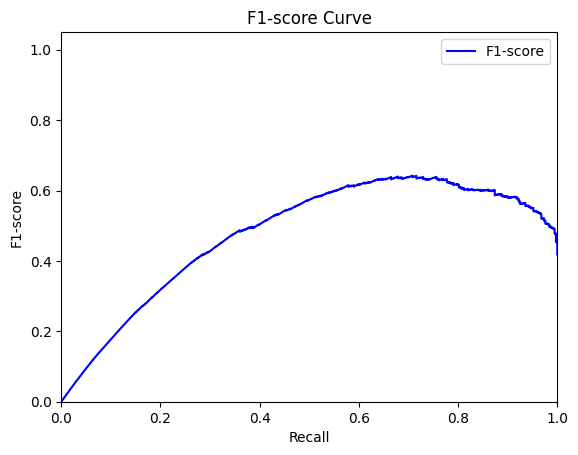

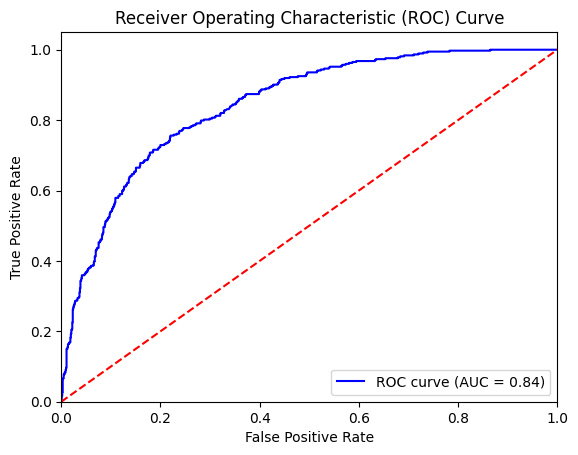

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)  # Adjust parameters as needed

# Train the model
logistic_regression.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [7]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn32.csv')
data.head()

SeniorCitizen  Partner  Dependents  PhoneService  TechSupport  StreamingTV  \
0              0        1           0             0            0            0   
1              0        0           0             1            0            0   
2              0        0           0             1            0            0   
3              0        0           0             0            2            0   
4              0        0           0             1            0            0   

   Contract  Churn  
0         0      0  
1         1      0  
2         0      1  
3         1      0  
4         0      1

In [8]:
# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      SeniorCitizen  Partner  Dependents  PhoneService  TechSupport  \
0                 0        1           0             0            0   
1                 0        0           0             1            0   
2                 0        0           0             1            0   
3                 0        0           0             0            2   
4                 0        0           0             1            0   
...             ...      ...         ...           ...          ...   
7038              0        1           1             1            2   
7039              0        1           1             1            0   
7040              0        1           1             0            0   
7041              1        1           0             1            0   
7042              0        0           0             1            2   

      StreamingTV  Contract  
0               0         0  
1               0         1  
2               0         0  
3               0         1

In [9]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.7665010645848119
Precision: 0.6208791208791209
Recall: 0.30294906166219837
F1-score: 0.4072072072072072
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1036
           1       0.62      0.30      0.41       373

    accuracy                           0.77      1409
   macro avg       0.70      0.62      0.63      1409
weighted avg       0.74      0.77      0.74      1409



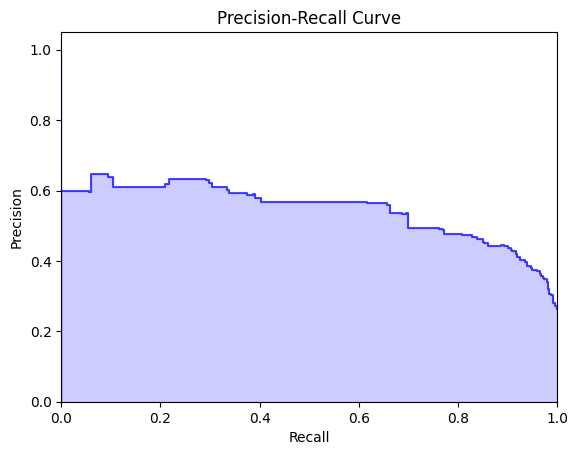

<ipython-input-11-88089d236c72>:45: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


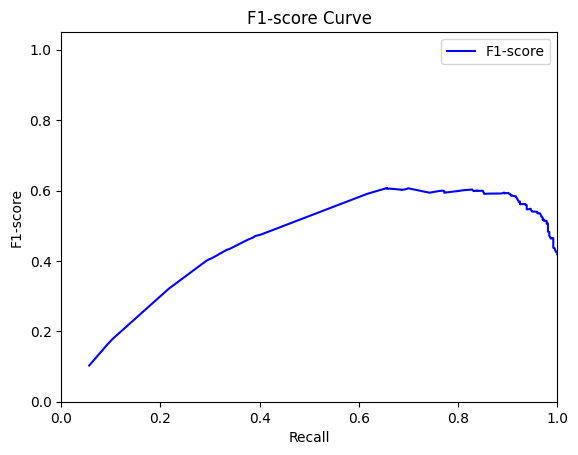

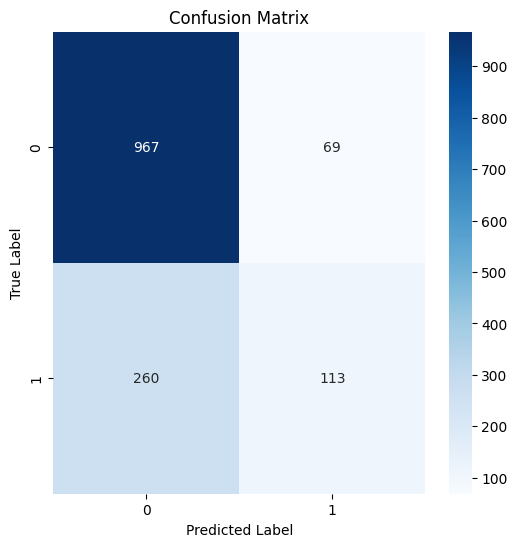

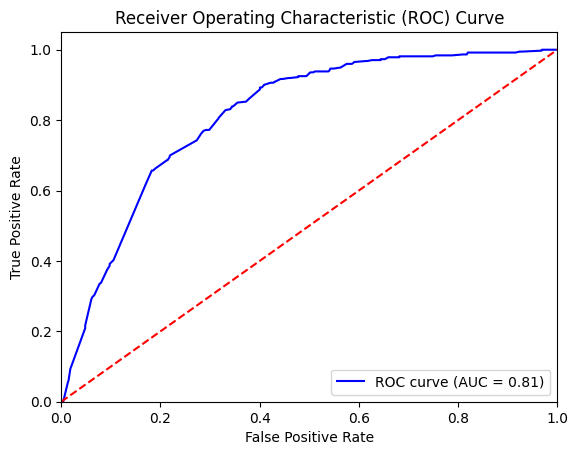

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)  # Adjust parameters as needed

# Train the model
logistic_regression.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn33.csv')
data.head()

gender  Dependents  tenure  MultipleLines  InternetService  Contract  \
0       0           0       1              1                0         0   
1       1           0      34              0                0         1   
2       1           0       2              0                0         0   
3       1           0      45              1                0         1   
4       0           0       2              0                1         0   

   PaperlessBilling  PaymentMethod  TotalCharges  Churn  
0                 1              2         29.85      0  
1                 0              3       1889.50      0  
2                 1              3        108.15      1  
3                 0              0       1840.75      0  
4                 1              2        151.65      1

In [13]:
# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      gender  Dependents  tenure  MultipleLines  InternetService  Contract  \
0          0           0       1              1                0         0   
1          1           0      34              0                0         1   
2          1           0       2              0                0         0   
3          1           0      45              1                0         1   
4          0           0       2              0                1         0   
...      ...         ...     ...            ...              ...       ...   
7038       1           1      24              2                0         1   
7039       0           1      72              2                1         1   
7040       0           1      11              1                0         0   
7041       1           0       4              2                1         0   
7042       1           0      66              0                1         2   

      PaperlessBilling  PaymentMethod  TotalCharges  
0        

In [14]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.7984386089425124
Precision: 0.6478405315614618
Recall: 0.5227882037533512
F1-score: 0.5786350148367954
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



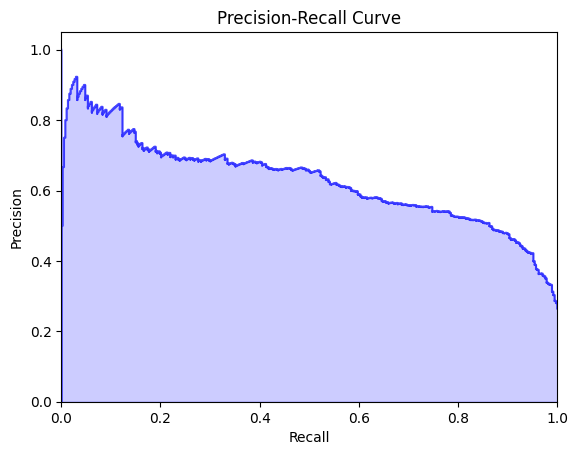

<ipython-input-16-88089d236c72>:45: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


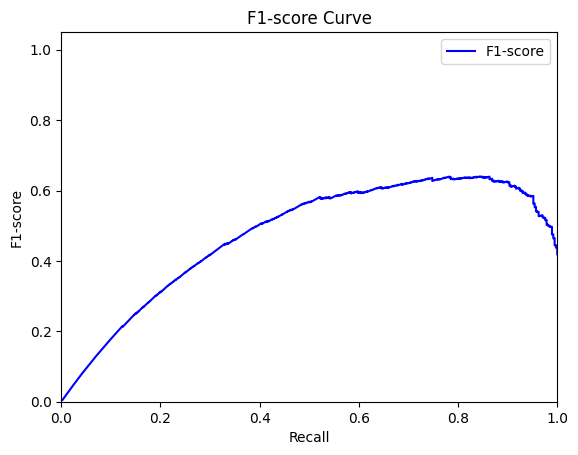

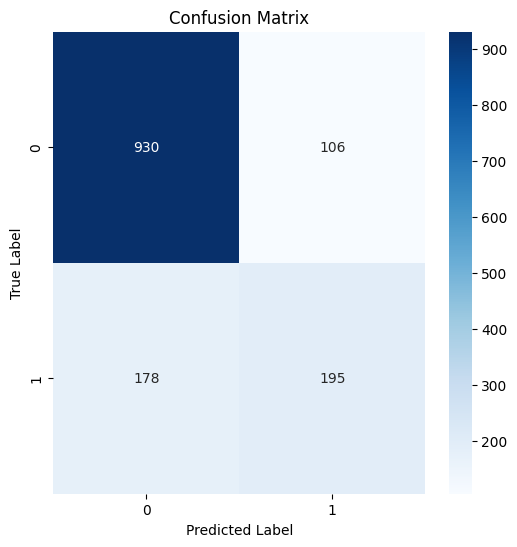

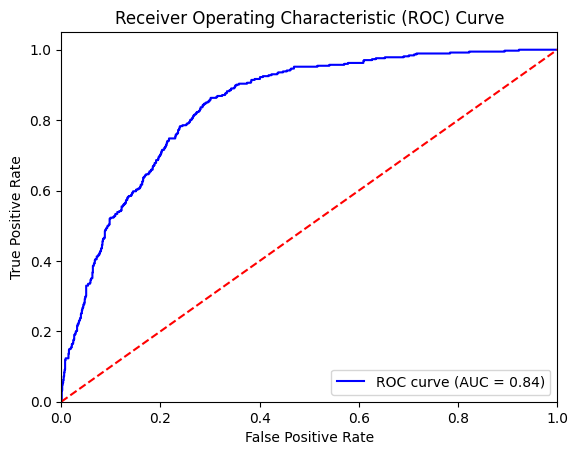

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)  # Adjust parameters as needed

# Train the model
logistic_regression.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [17]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn34.csv')
data.head()

gender  SeniorCitizen  Partner  PhoneService  MultipleLines  \
0       0              0        1             0              1   
1       1              0        0             1              0   
2       1              0        0             1              0   
3       1              0        0             0              1   
4       0              0        0             1              0   

   InternetService  OnlineBackup  TechSupport  StreamingMovies  \
0                0             2            0                0   
1                0             0            0                0   
2                0             2            0                0   
3                0             0            2                0   
4                1             0            0                0   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  
0                 1           29.85         29.85      0  
1                 0           56.95       1889.50      0  
2                 1           53.85        108.15      1  
3                 0           42.30       1840.75      0  
4                 1           70.70        151.65      1

In [18]:
# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      gender  SeniorCitizen  Partner  PhoneService  MultipleLines  \
0          0              0        1             0              1   
1          1              0        0             1              0   
2          1              0        0             1              0   
3          1              0        0             0              1   
4          0              0        0             1              0   
...      ...            ...      ...           ...            ...   
7038       1              0        1             1              2   
7039       0              0        1             1              2   
7040       0              0        1             0              1   
7041       1              1        1             1              2   
7042       1              0        0             1              0   

      InternetService  OnlineBackup  TechSupport  StreamingMovies  \
0                   0             2            0                0   
1                   0            

In [19]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8105039034776437
Precision: 0.6906474820143885
Recall: 0.514745308310992
F1-score: 0.5898617511520737
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



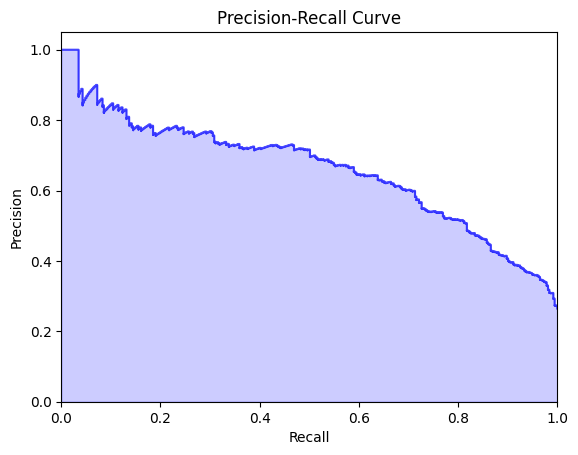

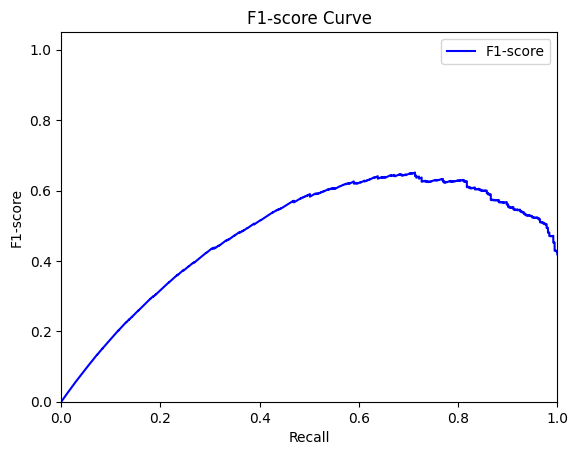

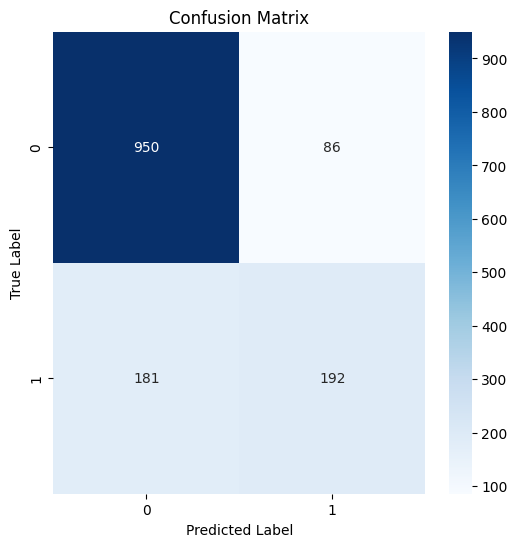

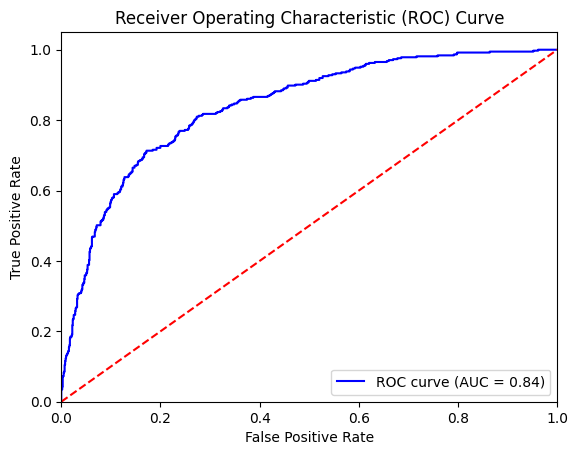

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)  # Adjust parameters as needed

# Train the model
logistic_regression.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
